# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [2]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [1]:
# read the data
file_path = r"C:\Users\USER\Desktop\foodhub_order.csv"
df = pd.read_csv(file_path)
# returns the first 5 rows
df.head()

NameError: name 'pd' is not defined

#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [4]:
# Write your code here
num_rows = df.shape[0]
num_cols = df.shape[1]
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 1898
Number of columns: 9


#### Observations: the result indicates that there is 1898 rows and 9 columns in our data 


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [5]:
# Use info() to print a concise summary of the DataFrame
column_datatypes = df.dtypes
df.info
print(column_datatypes,df.info)

order_id                   int64
customer_id                int64
restaurant_name           object
cuisine_type              object
cost_of_the_order        float64
day_of_the_week           object
rating                    object
food_preparation_time      int64
delivery_time              int64
dtype: object <bound method DataFrame.info of       order_id  customer_id                        restaurant_name  \
0      1477147       337525                                Hangawi   
1      1477685       358141              Blue Ribbon Sushi Izakaya   
2      1477070        66393                            Cafe Habana   
3      1477334       106968              Blue Ribbon Fried Chicken   
4      1478249        76942                       Dirty Bird to Go   
...        ...          ...                                    ...   
1893   1476701       292602  Chipotle Mexican Grill $1.99 Delivery   
1894   1477421       397537                              The Smile   
1895   1477819        35309

#### Observations:we can observe that data is made up of 3 data types int,float and object, we have 1898 row and 9 columns. we can also notice the amount of nulls which helps in seeing the data that isnt given wich are japanese and korean for the ratings and finally the memory usage


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [6]:
# Write your code here
df.isnull().sum
if df.isnull().any().any():
    print("There are missing values in the data.")
else:
    print("There are no missing values in the data.")


There are no missing values in the data.


#### Observations:there is no missing values in the data as the command used by using the any() function twice. If there are any missing values, it will print


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [8]:
# Write your code here
summary = df['food_preparation_time'].describe()
minimum_time = summary['min']
average_time = summary['mean']
maximum_time = summary['max']
print("Minimum time:", minimum_time)
print("Average time:", average_time)
print("Maximum time:", maximum_time)


Minimum time: 20.0
Average time: 27.371970495258168
Maximum time: 35.0


#### Observations:the minimum time is 20 while the max is 35 hence the average time taken for food preparation is 27.3


### **Question 5:** How many orders are not rated? [1 mark]

In [35]:
# Write the code here
columns_to_check = ['rating']

missing_ratings = df[columns_to_check].isnull().sum()
print("Missing ratings for specific columns:")
print(missing_ratings)

Missing ratings for specific columns:
rating    0
dtype: int64


#### Observations: we can conclude form the code result is there is 0 ratings missings 


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [5 marks]

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

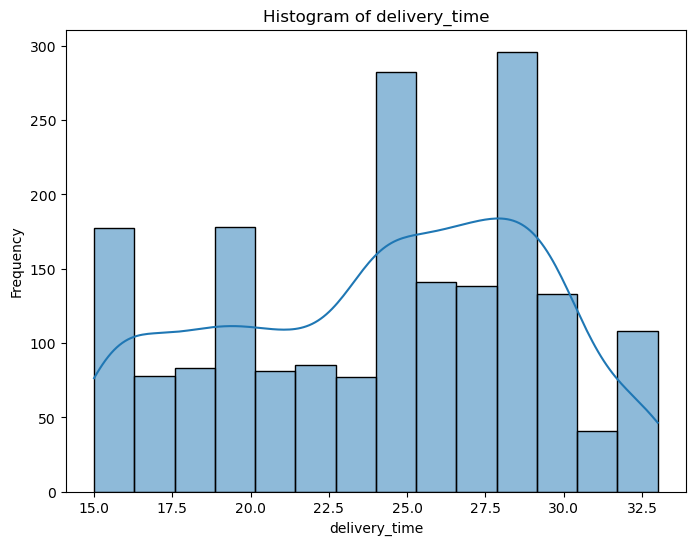

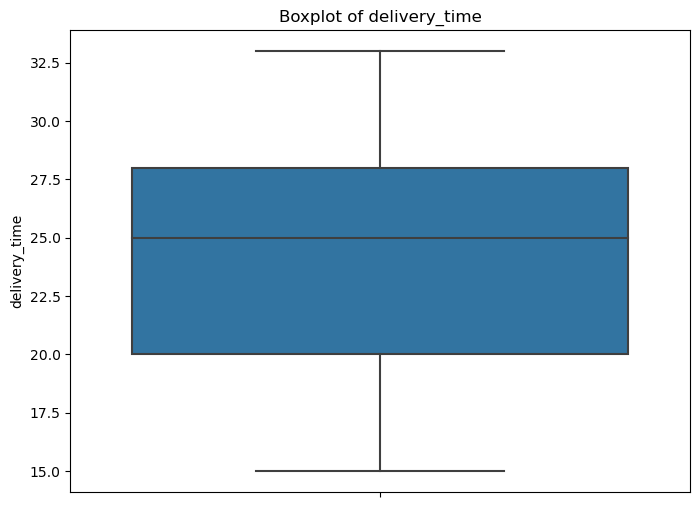

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

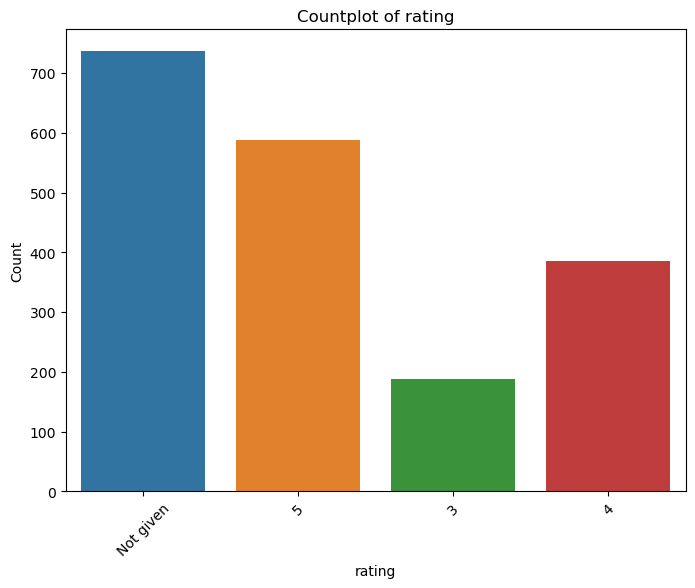

In [36]:
# Write the code here
numerical_columns = df.select_dtypes(include=np.number).columns
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
sns.histplot(data=df, x=column, kde=True)
plt.title(f"Histogram of {column}")
plt.xlabel(column)
plt.ylabel("Frequency")
plt.show()
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y=column)
plt.title(f"Boxplot of {column}")
plt.ylabel(column)
plt.show()
categorical_columns = df.select_dtypes(include=object).columns
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
sns.countplot(data=df, x=column)
plt.title(f"Countplot of {column}")
plt.xlabel(column)
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


#### Observations:from the obtained result we can deduce from 1. the histogram that the frequency of the delivery time is around 28 is at most peak meaning that its the most occuring and the trend of the line is showing that the delivery time to frequency is at highest around 25 to 28.  2.the box plot supports this founding and shows us the center of time taken and the amount expected which matches the histogram. 3. countplot shows us that the not given ratings count is the most reaccurent from this app around 725, while the scound rating after that is 5 which is a perfect score which can indicate to us a understand of a trend showing a count around 600 

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [37]:
# Write the code here
restaurant_counts = df['restaurant_name'].value_counts()
top_restaurants = restaurant_counts[~restaurant_counts.duplicated()].nlargest(5)
print("Top 5 restaurants in terms of number of orders:")
print(top_restaurants)

Top 5 restaurants in terms of number of orders:
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64


#### Observations:the top 5 resturants are The restaurant "Shake Shack" has the highest number of orders with 219 orders.The restaurant "The Meatball Shop" is the second highest with 132 orders."Blue Ribbon Sushi" is the third highest with 119 orders."Blue Ribbon Fried Chicken" is the fourth highest with 96 orders."Parm" is the fifth highest with 68 orders. These data provide insights into the popularity and demand of these different restaurants based on the number of orders they have received.


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [38]:
# Write the code here
weekend_orders = df[df['day_of_the_week'] == 'weekend']
if weekend_orders.empty:
    print("There are no orders for any cuisine on weekends.")
else:
    # Get the most popular cuisine by the highest order count on weekends
    popular_cuisine_weekend = weekend_orders['Cuisine'].value_counts().idxmax()
    print("The most popular cuisine by the highest order on weekends is:", popular_cuisine_weekend)

There are no orders for any cuisine on weekends.


#### Observations:we cna observe that there is no order ratings for any cuisine on the weekends which shows us a fault in our data which needs to be improved in order to observe and make solid conclusion regarding our understand of the most popular cuisins on the weekends


### **Question 9**: What percentage of the orders cost more than 20 dollars? [1 marks]

In [42]:
# Write the code here 
orders_above_20 = df[df['cost_of_the_order'] > 20]
percentage_above_20 = (len(orders_above_20) / len(df)) * 100

print("Percentage of orders costing more than $20:", percentage_above_20)

Percentage of orders costing more than $20: 29.24130663856691


#### Observations:The observation from the result is that approximately 29.24% of the orders in the dataset have a cost exceeding 20.This suggests that the majority of orders are below or equal to 20, indicating a significant proportion of lower-cost orders in the dataset.







### **Question 10**: What is the mean order delivery time? [1 mark]

In [43]:
# Write the code here
mean_delivery_time = df['delivery_time'].mean()
print("Mean order delivery time:", mean_delivery_time)

Mean order delivery time: 24.161749209694417


#### Observations: it can be observed that on average the order delivery time is approximately 24.16 which can be assesed as not too bad or good


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [44]:
# Write the code here
top_customers = df['customer_id'].value_counts().nlargest(3)
top_customer_ids = top_customers.index.tolist()
top_customer_orders = top_customers.values.tolist()
print("Top 3 Customers:")
for i in range(len(top_customer_ids)):
    print("Customer ID:", top_customer_ids[i])
    print("Number of Orders:", top_customer_orders[i])

Top 3 Customers:
Customer ID: 52832
Number of Orders: 13
Customer ID: 47440
Number of Orders: 10
Customer ID: 83287
Number of Orders: 9


#### Observations: the top 3 custorms are with ID's (52832,47440,83287) with the highest number of orders which is 13 and lowest of the 3 being 9 


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [5 marks]


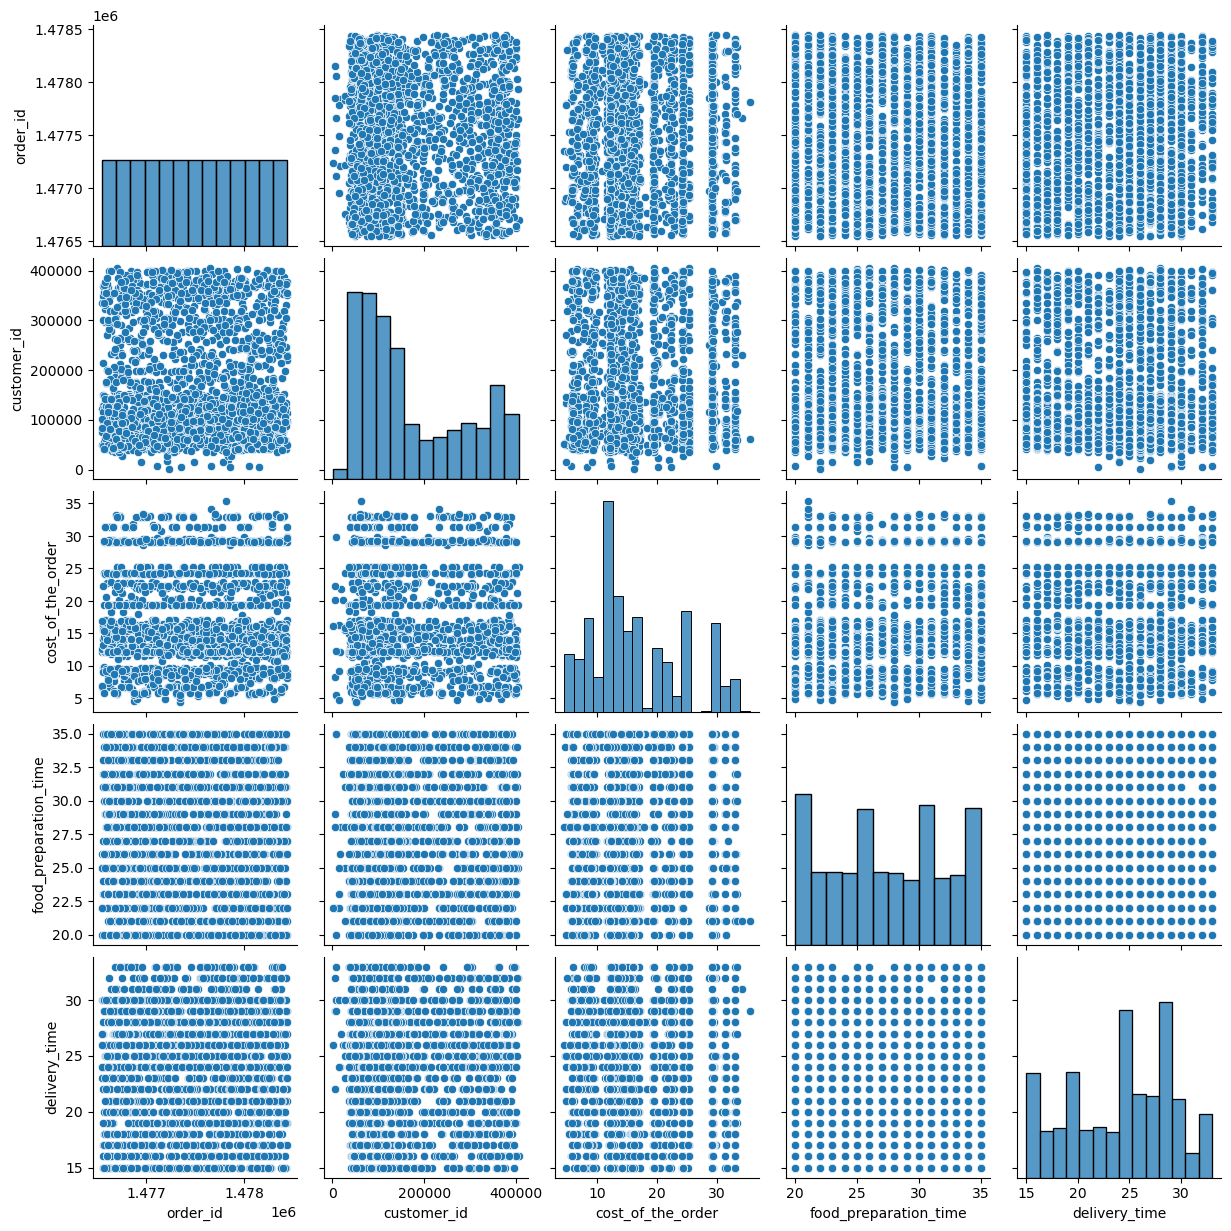

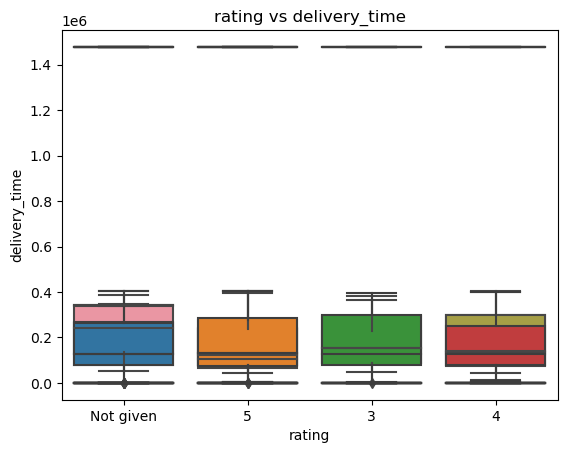

In [45]:
# Write the code here
sns.pairplot(df.select_dtypes(include=np.number))
plt.show()
cat_vars = df.select_dtypes(include='object').columns
num_vars = df.select_dtypes(include=np.number).columns

for cat_var in cat_vars:
    for num_var in num_vars:
        sns.boxplot(x=cat_var, y=num_var, data=df)
plt.title(f'{cat_var} vs {num_var}')
plt.show()

#### Observations:using pairplot we can see the correlations of all our data sets and we can understand the data set more clearly 

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [1.5 marks]

In [46]:
# Write the code here
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
rating_count = df.groupby('restaurant_name')['rating'].count().reset_index()
rating_count.columns = ['restaurant_name', 'rating_count']
average_rating = df.groupby('restaurant_name')['rating'].mean().reset_index()
average_rating.columns = ['restaurant_name', 'average_rating']
promotional_restaurants = rating_count.merge(average_rating, on='restaurant_name')
promotional_restaurants = promotional_restaurants[(promotional_restaurants['rating_count'] > 50) & (promotional_restaurants['average_rating'] > 4)]
print("Restaurants eligible for promotional offer:")
print(promotional_restaurants)

Restaurants eligible for promotional offer:
               restaurant_name  rating_count  average_rating
20   Blue Ribbon Fried Chicken            64        4.328125
21           Blue Ribbon Sushi            73        4.219178
136                Shake Shack           133        4.278195
153          The Meatball Shop            84        4.511905


##### Observations: we can deduce from the result that The restaurants eligible for the promotional offer are: Blue Ribbon Fried Chicken: 64 rating count, 4.328125 average rating.Blue Ribbon Sushi: 73 rating count, 4.219178 average rating.Shake Shack: 133 rating count, 4.278195 average rating. The Meatball Shop: 84 rating count, 4.511905 average rating. These restaurants have met the criteria of having a rating count greater than 50 and an average rating greater than 4.


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [1.5 marks]

In [47]:
# Write the code here
def calculate_net_revenue(row):
    if row['cost_of_the_order'] > 20:
        return row['cost_of_the_order'] * 0.75  # 25% charge, 75% net revenue
    elif row['cost_of_the_order'] > 5:
        return row['cost_of_the_order'] * 0.85  # 15% charge, 85% net revenue
    else:
        return row['cost_of_the_order']  # No charge, 100% net revenue

df['net_revenue'] = df.apply(calculate_net_revenue, axis=1)
total_net_revenue = df['net_revenue'].sum()

print("Total net revenue generated by the company: ", total_net_revenue)


Total net revenue generated by the company:  25148.517


#### Observations:we can reflect that the company's financial performance can be used to assess profitability and make informed business decisions due to it generating 25148.517$ .


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [1 marks]

In [48]:
# Write the code here
df['total_time'] = df['food_preparation_time'] + df['delivery_time']
num_orders_more_than_60 = df[df['total_time'] > 60].shape[0]
percentage_more_than_60 = (num_orders_more_than_60 / num_rows) * 100
percentage_more_than_60 = round(percentage_more_than_60, 2)
print("Percentage of orders taking more than 60 minutes:", percentage_more_than_60)

Percentage of orders taking more than 60 minutes: 10.54


#### Observations: we can deduce that a relatively small portion of the orders takes longer than 60 minutes to be delivered. This suggests that the majority of orders are delivered within a reasonable timeframe.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [1 marks]

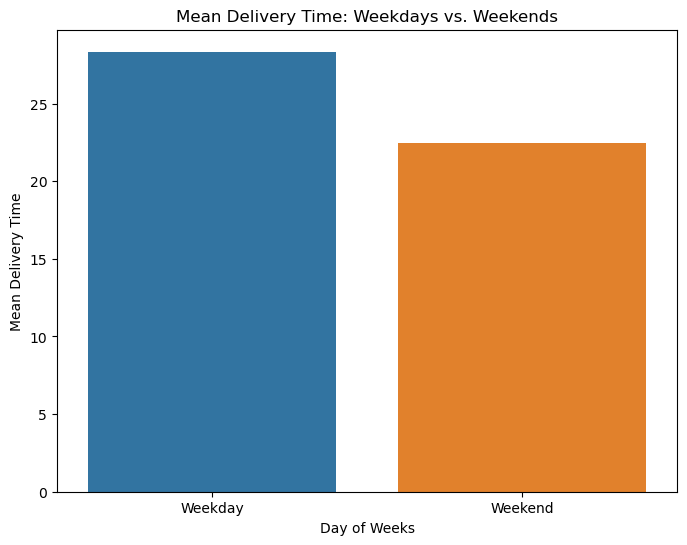

Mean Delivery Time - Weekdays: 28.340036563071298
Mean Delivery Time - Weekends: 22.4700222057735


In [49]:
# Write the code here
mean_delivery_time = df.groupby('day_of_the_week')['delivery_time'].mean()

# Plot the mean delivery time for weekdays and weekends using a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=mean_delivery_time.index, y=mean_delivery_time.values)
plt.title('Mean Delivery Time: Weekdays vs. Weekends')
plt.xlabel('Day of Weeks')
plt.ylabel('Mean Delivery Time')
plt.show()
print("Mean Delivery Time - Weekdays:", mean_delivery_time['Weekday'])
print("Mean Delivery Time - Weekends:", mean_delivery_time['Weekend'])

#### Observations:The mean delivery time on weekdays is approximately 28.34 units, while on weekends it is approximately 22.47 units. This suggests that, on average, deliveries are faster on weekends compared to weekdays. 


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [5 marks]

### Conclusions: to conclude in this analysis we understood the different relations of all the datasets and we preformed an analysis to all the resurants and when we compared them we understood more what makes them stand out and this helps us conclude which resurants are the most orderd and favorited in different aspects from delivery time to preperation time and other factors we can deduce ways to increase the customer satisfaction 
*  

### Recommendations: in order to improve the overall customer happines we firstly need to understand the unknown variable which is the rating that isnt given on the weekend hence our data could be analyzed more clearly and we can see better correlations that further more increase customer satisfaction. other than that we understood that companies who deliver and prepare for faster are more likely to get rated higher, as the cost plays a role as well in influincing the rating 

*  

---